In [130]:
import json
import requests
import pandas as pd
from pathlib import Path
import hvplot.pandas
import panel as pn
import holoviews as hv
import numpy as np
from pathlib import Path
from sklearn import cluster, covariance, manifold
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import warnings
warnings.filterwarnings('ignore')


In [68]:
events=pd.read_csv(
    Path('Institutional_Adoption_Events_in_2021.csv'),
    index_col='DATE',
    parse_dates=True,
    infer_datetime_format=True
)
events=events.fillna(0)
events.head()

,NEWS,CATEGORY,Institutional Adopt
DATE,,,
2021-01-05,JP Morgan: BTC Could Hit $146K,Banking,1.0
2021-01-11,UK FCA Warns: Prepare to Lose All Your Money,Government,-1.0
2021-01-25,UK FCA Warns: Bitcoin's Days Are Numbered,Government,-1.0
2021-01-28,Dorsey Positive BTC Tweet,Corporate,1.0
2021-01-28,Musk Positive BTC Tweet,Musk Tweet,1.0


In [69]:
events=events.drop(['NEWS', 'CATEGORY'], axis=1)
events.head()

,Institutional Adopt
DATE,
2021-01-05,1.0
2021-01-11,-1.0
2021-01-25,-1.0
2021-01-28,1.0
2021-01-28,1.0


In [75]:
prices=pd.read_csv(
    Path('crypto_market_caps.csv'),
    index_col='date',
    parse_dates=True,
    infer_datetime_format=True

)
prices.head()

,spell-token,illuvium,polyswarm,hackenai,mercurial,bitcoin,ethereum,solana,polkadot,cardano,...,uniswap,antimatter,1inch,aave,maker,lido-dao,serum,audius,arweave,bonfida
date,,,,,,,,,,,,,,,,,,,,,
2021-05-29,0.000000,-0.087474,-0.084921,-0.178955,-0.069173,-0.075526,-0.116392,-0.141745,-0.110146,-0.081747,...,-0.086776,-0.107659,-0.161449,-0.144139,-0.127478,-0.204751,-0.148758,-0.141004,-0.074100,-0.154125
2021-05-30,0.231838,-0.029180,-0.077416,-0.050995,-0.020782,-0.021363,-0.048031,-0.045486,-0.063362,-0.056490,...,-0.101236,-0.070963,-0.058184,-0.062235,-0.049803,-0.049462,-0.048317,-0.080900,-0.092101,-0.066768
2021-05-31,0.238859,0.067797,0.092618,-0.037861,0.022546,0.022048,0.035723,0.030508,0.015360,0.099605,...,0.095878,0.008402,0.111175,0.081288,0.070708,0.119675,0.043991,0.033885,0.081935,0.058975
2021-06-01,-0.059507,0.106957,0.026690,-0.004131,-0.004840,0.045575,0.130062,0.145793,0.143006,0.109167,...,0.102625,0.202528,0.106781,0.178813,0.082806,0.195291,0.104627,0.063740,0.081550,0.123031
2021-06-02,-0.205798,-0.007821,-0.032677,0.333030,-0.024114,-0.014893,-0.025359,-0.050999,-0.015254,0.000810,...,-0.030430,-0.194083,-0.023898,-0.023796,0.002862,-0.057441,-0.031295,0.050371,0.002730,-0.042151


In [76]:
combined=pd.merge(prices,events,left_index=True, right_index=True)
combined.head()

,spell-token,illuvium,polyswarm,hackenai,mercurial,bitcoin,ethereum,solana,polkadot,cardano,...,antimatter,1inch,aave,maker,lido-dao,serum,audius,arweave,bonfida,Institutional Adopt
2021-01-05,0.0,0.0,-0.088201,-0.122700,0.0,-0.045453,0.037039,0.120509,-0.108976,0.046063,...,0.0,-0.098702,0.142612,-0.026812,-0.520328,0.059270,-0.080577,0.018532,0.080724,1.0
2021-01-11,0.0,0.0,-0.124492,0.013456,0.0,-0.047065,-0.017793,0.018627,-0.046345,-0.088513,...,0.0,-0.040125,0.072599,-0.004479,0.178859,-0.065430,0.032943,0.286570,-0.050304,-1.0
2021-01-25,0.0,0.0,0.158066,0.036937,0.0,0.006453,0.123560,0.039617,-0.024279,0.012231,...,0.0,0.274647,0.272098,0.054592,0.776100,0.116290,0.009767,0.122378,0.071658,-1.0
2021-01-28,0.0,0.0,-0.036659,0.178912,0.0,-0.065799,-0.087956,-0.084846,-0.098515,-0.098414,...,0.0,-0.056205,0.037974,-0.093725,-0.182521,-0.139449,-0.112352,-0.104540,-0.068550,1.0
2021-01-28,0.0,0.0,-0.036659,0.178912,0.0,-0.065799,-0.087956,-0.084846,-0.098515,-0.098414,...,0.0,-0.056205,0.037974,-0.093725,-0.182521,-0.139449,-0.112352,-0.104540,-0.068550,1.0


In [77]:
combined = combined.dropna(axis=0, how='all')
combined = combined.dropna(axis=1)
combined

,spell-token,illuvium,polyswarm,hackenai,mercurial,bitcoin,ethereum,solana,polkadot,cardano,...,antimatter,1inch,aave,maker,lido-dao,serum,audius,arweave,bonfida,Institutional Adopt
2021-01-05,0.000000,0.000000,-0.088201,-0.122700,0.000000,-0.045453,0.037039,0.120509,-0.108976,0.046063,...,0.000000,-0.098702,0.142612,-0.026812,-0.520328,0.059270,-0.080577,0.018532,0.080724,1.0
2021-01-11,0.000000,0.000000,-0.124492,0.013456,0.000000,-0.047065,-0.017793,0.018627,-0.046345,-0.088513,...,0.000000,-0.040125,0.072599,-0.004479,0.178859,-0.065430,0.032943,0.286570,-0.050304,-1.0
2021-01-25,0.000000,0.000000,0.158066,0.036937,0.000000,0.006453,0.123560,0.039617,-0.024279,0.012231,...,0.000000,0.274647,0.272098,0.054592,0.776100,0.116290,0.009767,0.122378,0.071658,-1.0
2021-01-28,0.000000,0.000000,-0.036659,0.178912,0.000000,-0.065799,-0.087956,-0.084846,-0.098515,-0.098414,...,0.000000,-0.056205,0.037974,-0.093725,-0.182521,-0.139449,-0.112352,-0.104540,-0.068550,1.0
2021-01-28,0.000000,0.000000,-0.036659,0.178912,0.000000,-0.065799,-0.087956,-0.084846,-0.098515,-0.098414,...,0.000000,-0.056205,0.037974,-0.093725,-0.182521,-0.139449,-0.112352,-0.104540,-0.068550,1.0
2021-02-08,0.000000,0.000000,0.071374,-0.045171,0.000000,-0.012313,-0.041916,0.078294,-0.035286,0.053139,...,0.000000,-0.054602,0.017914,-0.047580,-0.051430,-0.023283,0.174763,0.089021,-0.024576,1.0
2021-02-08,0.000000,0.000000,0.071374,-0.045171,0.000000,-0.012313,-0.041916,0.078294,-0.035286,0.053139,...,0.000000,-0.054602,0.017914,-0.047580,-0.051430,-0.023283,0.174763,0.089021,-0.024576,1.0
2021-02-10,0.000000,0.000000,0.030380,0.017489,0.000000,0.005509,0.022061,-0.000492,0.009954,0.031103,...,0.000000,-0.039151,0.008010,0.033947,-0.058943,0.087335,0.075167,0.084870,0.032516,1.0
2021-03-01,0.000000,0.000000,-0.001941,-0.020123,0.000000,-0.036040,-0.027074,-0.005707,0.007087,-0.002945,...,-0.029627,-0.077908,0.052371,0.028151,-0.096228,-0.061104,-0.068241,-0.152699,-0.051254,1.0
2021-03-04,0.000000,0.000000,0.255754,-0.071696,0.000000,0.041480,0.058806,0.010639,0.024888,-0.005755,...,0.115919,0.018717,0.014414,0.021569,-0.031765,0.029723,0.086343,0.341999,0.033715,1.0


In [78]:
combined_new=combined.drop(['Institutional Adopt'], axis=1)
combined_new

,spell-token,illuvium,polyswarm,hackenai,mercurial,bitcoin,ethereum,solana,polkadot,cardano,...,uniswap,antimatter,1inch,aave,maker,lido-dao,serum,audius,arweave,bonfida
2021-01-05,0.000000,0.000000,-0.088201,-0.122700,0.000000,-0.045453,0.037039,0.120509,-0.108976,0.046063,...,-0.063158,0.000000,-0.098702,0.142612,-0.026812,-0.520328,0.059270,-0.080577,0.018532,0.080724
2021-01-11,0.000000,0.000000,-0.124492,0.013456,0.000000,-0.047065,-0.017793,0.018627,-0.046345,-0.088513,...,-0.039399,0.000000,-0.040125,0.072599,-0.004479,0.178859,-0.065430,0.032943,0.286570,-0.050304
2021-01-25,0.000000,0.000000,0.158066,0.036937,0.000000,0.006453,0.123560,0.039617,-0.024279,0.012231,...,0.728951,0.000000,0.274647,0.272098,0.054592,0.776100,0.116290,0.009767,0.122378,0.071658
2021-01-28,0.000000,0.000000,-0.036659,0.178912,0.000000,-0.065799,-0.087956,-0.084846,-0.098515,-0.098414,...,0.090114,0.000000,-0.056205,0.037974,-0.093725,-0.182521,-0.139449,-0.112352,-0.104540,-0.068550
2021-01-28,0.000000,0.000000,-0.036659,0.178912,0.000000,-0.065799,-0.087956,-0.084846,-0.098515,-0.098414,...,0.090114,0.000000,-0.056205,0.037974,-0.093725,-0.182521,-0.139449,-0.112352,-0.104540,-0.068550
2021-02-08,0.000000,0.000000,0.071374,-0.045171,0.000000,-0.012313,-0.041916,0.078294,-0.035286,0.053139,...,-0.040114,0.000000,-0.054602,0.017914,-0.047580,-0.051430,-0.023283,0.174763,0.089021,-0.024576
2021-02-08,0.000000,0.000000,0.071374,-0.045171,0.000000,-0.012313,-0.041916,0.078294,-0.035286,0.053139,...,-0.040114,0.000000,-0.054602,0.017914,-0.047580,-0.051430,-0.023283,0.174763,0.089021,-0.024576
2021-02-10,0.000000,0.000000,0.030380,0.017489,0.000000,0.005509,0.022061,-0.000492,0.009954,0.031103,...,0.018177,0.000000,-0.039151,0.008010,0.033947,-0.058943,0.087335,0.075167,0.084870,0.032516
2021-03-01,0.000000,0.000000,-0.001941,-0.020123,0.000000,-0.036040,-0.027074,-0.005707,0.007087,-0.002945,...,-0.049854,-0.029627,-0.077908,0.052371,0.028151,-0.096228,-0.061104,-0.068241,-0.152699,-0.051254
2021-03-04,0.000000,0.000000,0.255754,-0.071696,0.000000,0.041480,0.058806,0.010639,0.024888,-0.005755,...,-0.000634,0.115919,0.018717,0.014414,0.021569,-0.031765,0.029723,0.086343,0.341999,0.033715


In [137]:
variation = combined_new
variation.shape

(45, 52)

In [254]:
column_names= list(combined_new)

In [284]:
# calculate mean and variance for each token
annual_returns = []
variance = []
for x in column_names:
    annual_returns.append(combined_new[x].mean()*252)
    variance.append(combined_new[x].std()*np.sqrt(252))
    
    

In [256]:
stats=pd.DataFrame([annual_returns,variance])

In [257]:
stats_df=stats.T

In [258]:
stats_df.columns=('annual_return','variance')

In [259]:
stats_df.index=column_names

In [260]:
stats_df.head()

,annual_return,variance
spell-token,26.562876,8.935940
illuvium,0.316245,1.416295
polyswarm,0.670678,2.246844
hackenai,0.693699,1.838572
mercurial,10.681096,5.695526


In [261]:
# Create a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

In [262]:
# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the service_ratings DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(stats_df)
    inertia.append(k_model.inertia_)

In [263]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,1344.571129
1,2,601.554786
2,3,246.535615
3,4,110.699458
4,5,63.464980


In [264]:
# Plot the DataFrame
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

In [265]:
# Create and initialize the K-means model instance for 4 clusters
model = KMeans(n_clusters=4, random_state=1)

In [266]:
# Fit the data to the instance of the model
model.fit(stats_df)

# Make predictions about the data clusters using the trained model
crypto_clusters = model.predict(stats_df)
crypto_clusters

array([1, 0, 0, 0, 3, 2, 0, 3, 2, 0, 0, 0, 0, 2, 2, 0, 3, 3, 2, 2, 2, 0,
       2, 0, 0, 0, 3, 0, 0, 3, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 0, 3, 3], dtype=int32)

In [267]:
len(crypto_clusters)

52

In [268]:
crypto_clusters_df = pd.DataFrame(crypto_clusters)
crypto_clusters_df.head()

,0
0,1
1,0
2,0
3,0
4,3


In [273]:
stats_df['crypto_cluster']=crypto_clusters
stats_df['names']=column_names
stats_df


,annual_return,variance,crypto_cluster,names
spell-token,26.562876,8.935940,1,spell-token
illuvium,0.316245,1.416295,0,illuvium
polyswarm,0.670678,2.246844,0,polyswarm
hackenai,0.693699,1.838572,0,hackenai
mercurial,10.681096,5.695526,3,mercurial
bitcoin,-2.732138,0.719423,2,bitcoin
ethereum,-1.083403,1.052043,0,ethereum
solana,4.317745,1.577234,3,solana
polkadot,-3.413131,1.445858,2,polkadot
cardano,1.061903,1.284713,0,cardano


In [285]:
# Plot the crypto clusters Data Frame
stats_df.hvplot.scatter(x="annual_return", y="variance", by="crypto_cluster",text='names',text_baseline='top',hover=True)
#stats_df.hvplot.labels(x='annual_return', y='variance',by='crypto_cluster', text='names',text_baseline='top', hover=True)

:NdOverlay   [crypto_cluster]
   :Scatter   [annual_return]   (variance)

In [126]:
correlations_df=combined_new.corr()
btc_correlations=correlations_df.loc['bitcoin']

In [128]:
btc_correlations=btc_correlations.sort_values()

btc_correlations.hvplot.scatter()

:Scatter   [index]   (bitcoin)

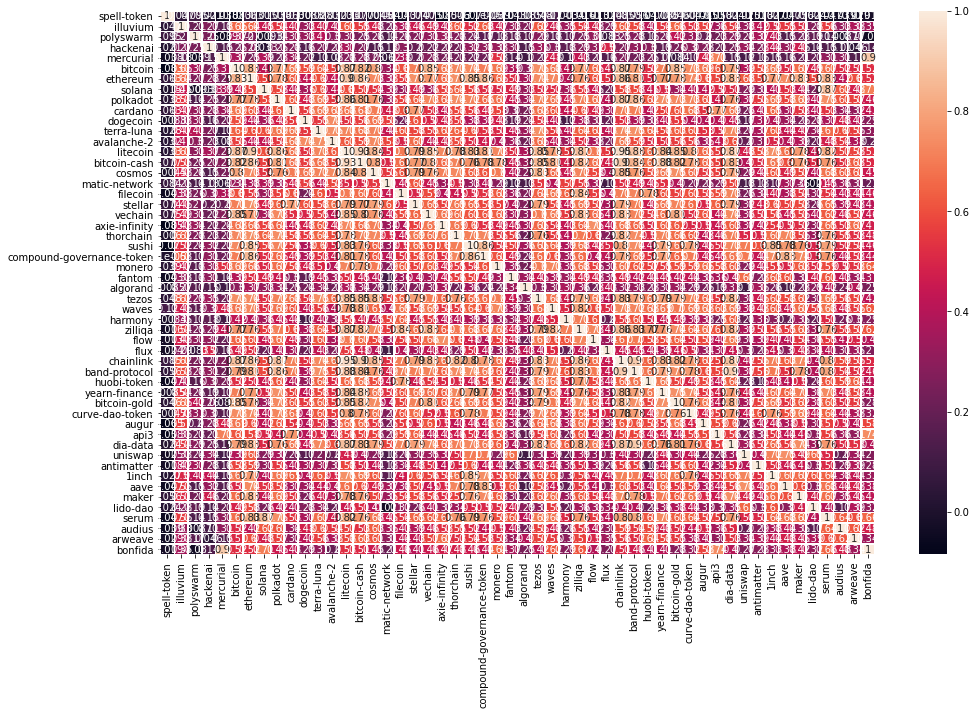

In [135]:
plt.figure(figsize = (16,10))
ax = sns.heatmap(correlations_df, annot=True, linewidths=.5)


In [204]:
correlations_df

,spell-token,illuvium,polyswarm,hackenai,mercurial,bitcoin,ethereum,solana,polkadot,cardano,...,uniswap,antimatter,1inch,aave,maker,lido-dao,serum,audius,arweave,bonfida
spell-token,1.000000,0.046561,0.094805,0.020756,-0.038072,-0.082778,0.062578,0.014987,0.037968,0.062622,...,-0.024849,-0.018013,0.027066,-0.047089,0.055656,0.023666,-0.046619,-0.039296,-0.029301,-0.019236
illuvium,0.046561,1.000000,0.209217,0.273235,0.178246,0.656494,0.643758,0.448241,0.541015,0.466929,...,0.333566,0.419405,0.500925,0.547401,0.513702,0.275377,0.555976,0.326874,0.381906,0.351981
polyswarm,0.094805,0.209217,1.000000,0.249664,-0.038955,0.367388,0.266252,-0.009303,0.140796,0.327459,...,0.243908,0.367302,0.430148,0.147856,0.233916,0.191077,0.137770,0.008707,0.171940,-0.030442
hackenai,0.020756,0.273235,0.249664,1.000000,0.147902,0.251696,0.279630,0.032555,0.253279,0.283781,...,0.335642,0.275980,0.438543,0.324184,0.464944,0.135623,0.148273,0.111074,0.046294,0.142799
mercurial,-0.038072,0.178246,-0.038955,0.147902,1.000000,0.369975,0.250853,0.389012,0.228379,0.342328,...,0.115403,0.160206,0.148447,0.161600,0.211318,0.205108,0.310975,0.311556,0.146258,0.899756
bitcoin,-0.082778,0.656494,0.367388,0.251696,0.369975,1.000000,0.833310,0.425701,0.773072,0.691593,...,0.390483,0.577404,0.692840,0.507552,0.668194,0.488493,0.671404,0.516232,0.510478,0.521069
ethereum,0.062578,0.643758,0.266252,0.279630,0.250853,0.833310,1.000000,0.572890,0.775109,0.625657,...,0.626374,0.586210,0.768962,0.738504,0.828428,0.579396,0.831961,0.417615,0.597790,0.522625
solana,0.014987,0.448241,-0.009303,0.032555,0.389012,0.425701,0.572890,1.000000,0.582057,0.439331,...,0.291018,0.314050,0.413363,0.528255,0.443206,0.256885,0.869073,0.619206,0.482174,0.707520
polkadot,0.037968,0.541015,0.140796,0.253279,0.228379,0.773072,0.775109,0.582057,1.000000,0.623502,...,0.373392,0.546918,0.687787,0.575558,0.685817,0.420500,0.746123,0.609992,0.570840,0.458210
cardano,0.062622,0.466929,0.327459,0.283781,0.342328,0.691593,0.625657,0.439331,0.623502,1.000000,...,0.252346,0.407985,0.645729,0.368244,0.534168,0.407137,0.534846,0.341938,0.315846,0.433181


In [ ]:
# Plot the DataFrame
# Visualization
plt.figure(1, facecolor='w', figsize=(12, 9))
plt.clf()
ax = plt.axes([0., 0., 1., 1.])
plt.axis('off')


#Display a graph of the partial correlations
partial_correlations = edge_model.precision_.copy()
d = 1 / np.sqrt(np.diag(partial_correlations))
partial_correlations *= d
partial_correlations *= d[:, np.newaxis]
non_zero = (np.abs(np.triu(partial_correlations, k=1)) > 0.02)


# Plot the nodes using the coordinates of our embedding
plt.scatter(embedding[0], embedding[1], s=100 * d ** 2, c=labels,
            cmap=plt.cm.nipy_spectral)

# Plot the edges
start_idx, end_idx = np.where(non_zero)

# a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [[embedding[:, start], embedding[:, stop]]
            for start, stop in zip(start_idx, end_idx)]
values = np.abs(partial_correlations[non_zero])
lc = LineCollection(segments,
                    zorder=0, cmap=plt.cm.hot_r,
                    norm=plt.Normalize(0, .7 * values.max()))
lc.set_array(values)
lc.set_linewidths(15 * values)
ax.add_collection(lc)


# Add a label to each node. The challenge here is that we want to
# position the labels to avoid overlap with other labels
for index, (name, label, (x, y)) in enumerate(
        zip(names, labels, embedding.T)):
    dx = x - embedding[0]
    dx[index] = 1
    dy = y - embedding[1]
    dy[index] = 1
    this_dx = dx[np.argmin(np.abs(dy))]
    this_dy = dy[np.argmin(np.abs(dx))]
    if this_dx > 0:
        horizontalalignment = 'left'
        x = x + .002
    else:
        horizontalalignment = 'right'
        x = x - .002
    if this_dy > 0:
        verticalalignment = 'bottom'
        y = y + .002
    else:
        verticalalignment = 'top'
        y = y - .002
    plt.text(x, y, name, size=10,
             horizontalalignment=horizontalalignment,
             verticalalignment=verticalalignment,
             bbox=dict(facecolor='w',
                       edgecolor=plt.cm.nipy_spectral(label / float(n_labels)),
                       alpha=.6))
plt.xlim(embedding[0].min() - .15 * embedding[0].ptp(),
         embedding[0].max() + .10 * embedding[0].ptp(),)
plt.ylim(embedding[1].min() - .03 * embedding[1].ptp(),
         embedding[1].max() + .03 * embedding[1].ptp())
plt.show()